In [1]:
import scanpy as sc

In [2]:
stardist = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_stardist_binning_stats.h5ad')

In [3]:
voronoi = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_voronoi_binning_stats.h5ad')


In [4]:
stardist

AnnData object with n_obs × n_vars = 81463 × 313
    obs: 'id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters', 'CellType', 'similarity', 'cell_id', 'realCellType'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'CellType_colors', 'clusters', 'hvg', 'log1p', 'neighbors', 'pca', 'realCellType_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
stardist.obs['similarity']

0        0.532738
1        0.291986
2        0.549859
3        0.347992
4        0.243888
           ...   
83942    0.358556
83943    0.205105
83944    0.481582
83945    0.543553
83946    0.204596
Name: similarity, Length: 81463, dtype: float64

In [6]:
voronoi.obs['similarity']

0         0.386171
1         0.639373
2         0.411431
3         0.597217
4         0.306081
            ...   
107801    0.618657
107802    0.522784
107803    0.327798
107804    0.638160
107805    0.386781
Name: similarity, Length: 103801, dtype: float64

/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_66932/563369151.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0], x='Method', y='Similarity', data=data, palette='muted')
/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_66932/563369151.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[1], x='Method', y='n_genes_by_counts', data=data, palette='muted')
/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_66932/563369151.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[2],

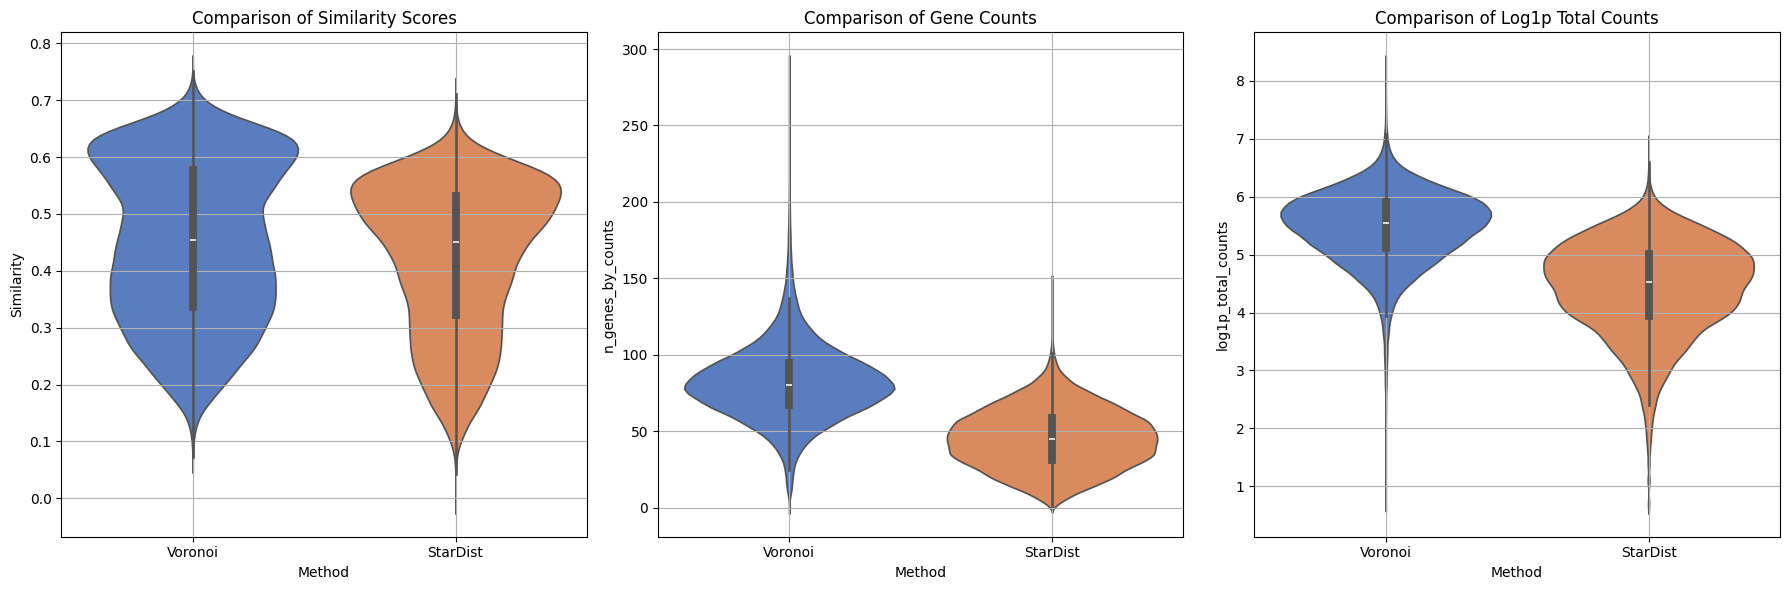

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc

# Extract the 'similarity', 'n_genes_by_counts', and 'log1p_total_counts' values from both datasets
voronoi_similarity = voronoi.obs['similarity']
stardist_similarity = stardist.obs['similarity']

voronoi_n_genes = voronoi.obs['n_genes_by_counts']
stardist_n_genes = stardist.obs['n_genes_by_counts']

voronoi_log1p_total_counts = voronoi.obs['log1p_total_counts']
stardist_log1p_total_counts = stardist.obs['log1p_total_counts']

# Combine the data into a DataFrame for easy plotting
data = pd.DataFrame({
    'Similarity': pd.concat([voronoi_similarity, stardist_similarity]),
    'n_genes_by_counts': pd.concat([voronoi_n_genes, stardist_n_genes]),
    'log1p_total_counts': pd.concat([voronoi_log1p_total_counts, stardist_log1p_total_counts]),
    'Method': ['Voronoi'] * len(voronoi_similarity) + ['StarDist'] * len(stardist_similarity)
})

# Create violin plots side by side for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Violin plot for 'similarity'
sns.violinplot(ax=axes[0], x='Method', y='Similarity', data=data, palette='muted')
axes[0].set_title('Comparison of Similarity Scores')
axes[0].set_ylabel('Similarity')
axes[0].set_xlabel('Method')
axes[0].grid(True)

# Violin plot for 'n_genes_by_counts'
sns.violinplot(ax=axes[1], x='Method', y='n_genes_by_counts', data=data, palette='muted')
axes[1].set_title('Comparison of Gene Counts')
axes[1].set_ylabel('n_genes_by_counts')
axes[1].set_xlabel('Method')
axes[1].grid(True)

# Violin plot for 'log1p_total_counts'
sns.violinplot(ax=axes[2], x='Method', y='log1p_total_counts', data=data, palette='muted')
axes[2].set_title('Comparison of Log1p Total Counts')
axes[2].set_ylabel('log1p_total_counts')
axes[2].set_xlabel('Method')
axes[2].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


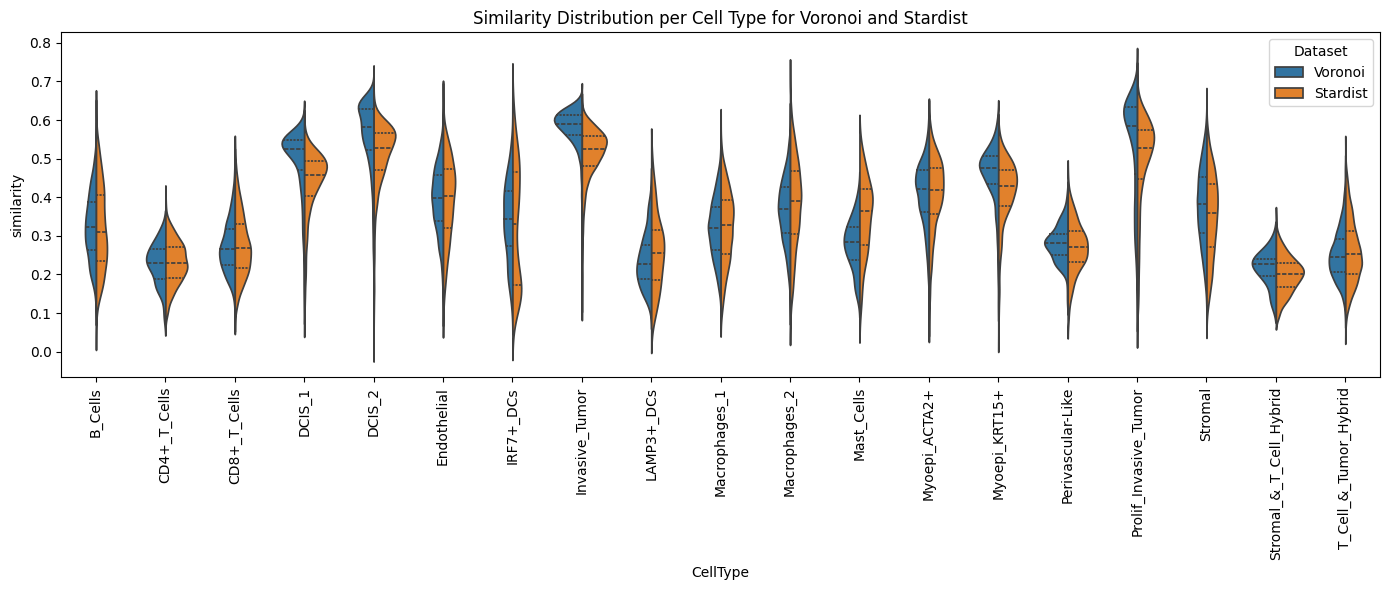

In [12]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the relevant data from the AnnData objects
voronoi_df = pd.DataFrame({
    'similarity': voronoi.obs['similarity'],
    'CellType': voronoi.obs['CellType'],
    'Dataset': 'Voronoi'
})

stardist_df = pd.DataFrame({
    'similarity': stardist.obs['similarity'],
    'CellType': stardist.obs['CellType'],
    'Dataset': 'Stardist'
})

# Combine the data from both datasets
combined_df = pd.concat([voronoi_df, stardist_df])

# Create the violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=combined_df, x='CellType', y='similarity', hue='Dataset', split=True, inner="quart")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title
plt.title('Similarity Distribution per Cell Type for Voronoi and Stardist')

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
sc.pp.calculate_qc_metrics(stardist, inplace=True, percent_top=[50, 100, 200])

In [14]:
sc.pp.calculate_qc_metrics(voronoi, inplace=True, percent_top=[50, 100, 200])

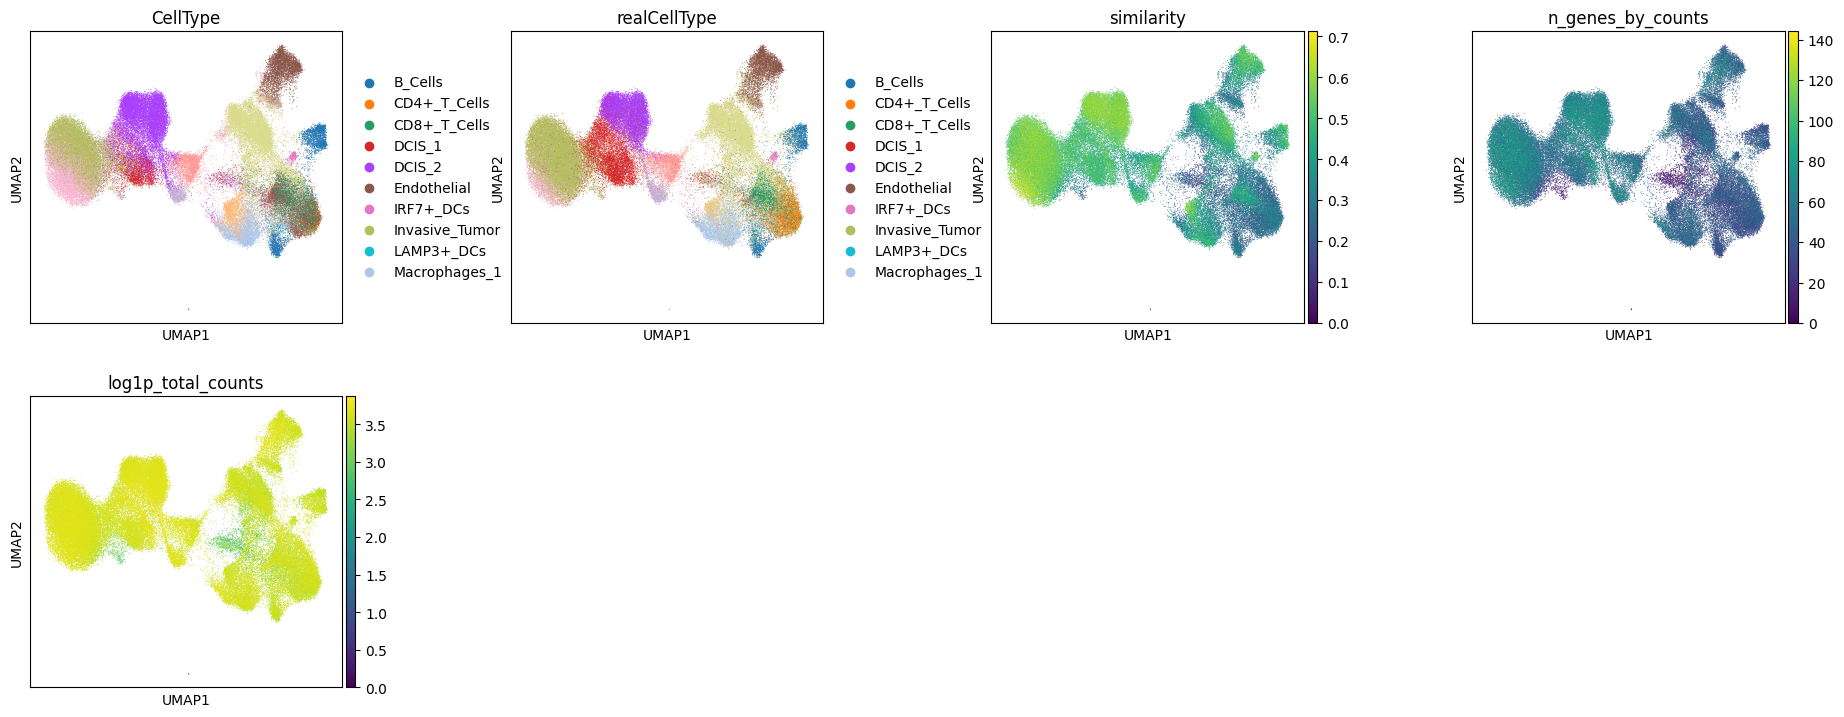

In [16]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(stardist, color=["CellType", "realCellType", 'similarity', 'n_genes_by_counts', 'log1p_total_counts'], wspace=0.4)

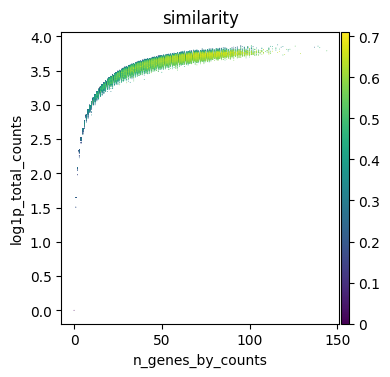

In [17]:
sc.pl.scatter(stardist, x='n_genes_by_counts', y='log1p_total_counts', color='similarity')

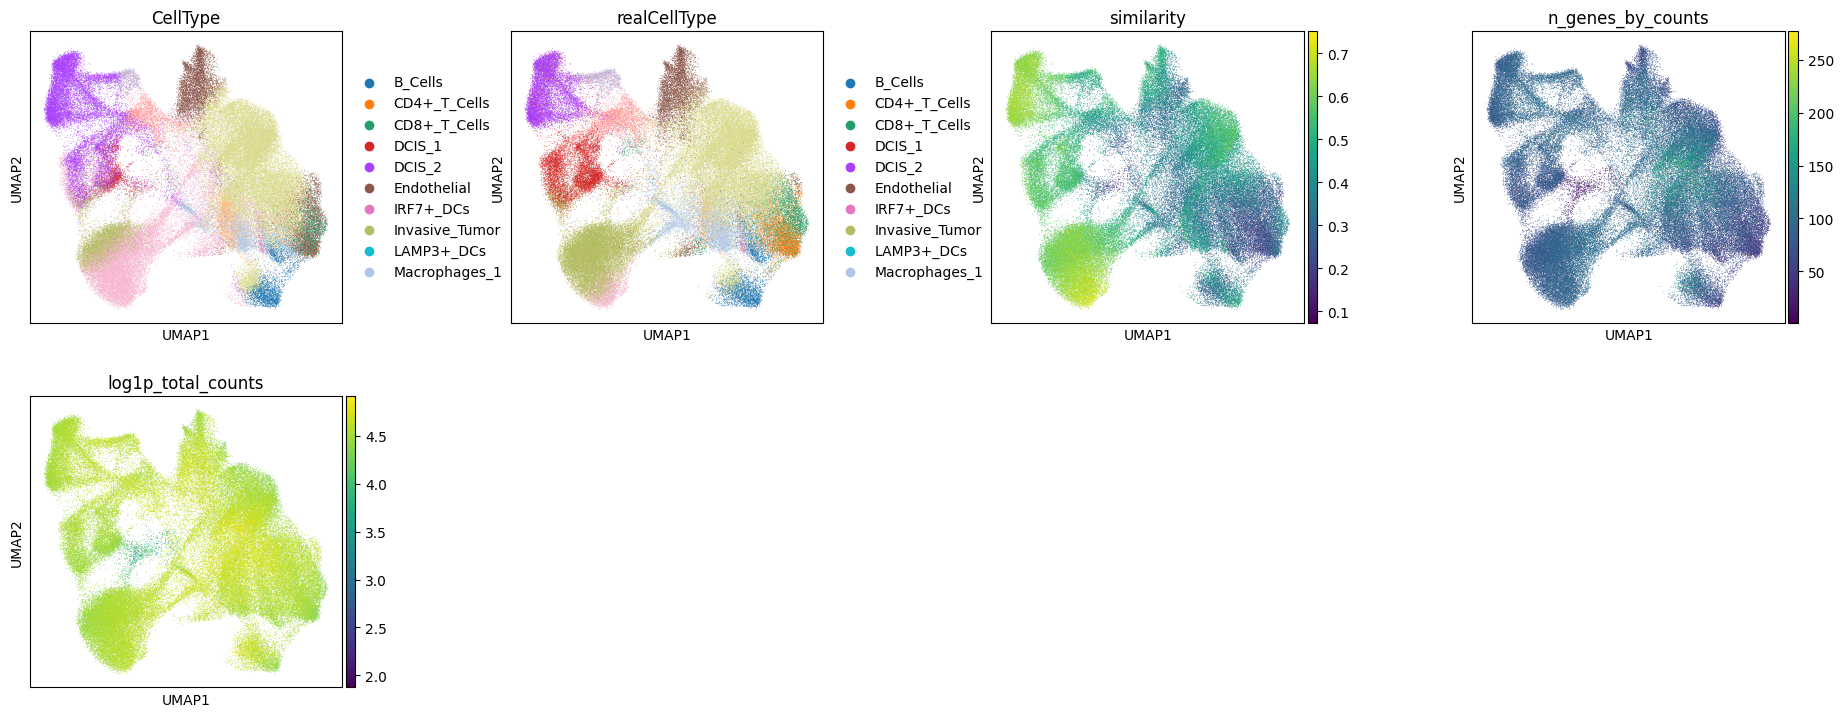

In [18]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(voronoi, color=["CellType", "realCellType", 'similarity', 'n_genes_by_counts', 'log1p_total_counts'], wspace=0.4)

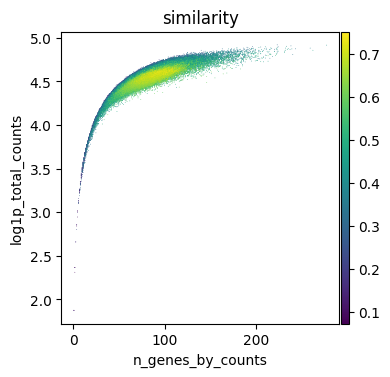

In [19]:
sc.pl.scatter(voronoi, x='n_genes_by_counts', y='log1p_total_counts', color='similarity')